In [1]:
import pandas as pd
import numpy as np

In [2]:
atl = pd.read_csv('/home/shaury/Desktop/pvsc/dataset/atl.csv')
atl.head()

,Unnamed: 0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,13,2018-01-01,UA,2414,EWR,ATL,1044,1055.0,11.0,11.0,...,154.0,140.0,124.0,746.0,NaN,NaN,NaN,NaN,NaN,NaN
1,241,2018-01-01,UA,1970,EWR,ATL,1409,1429.0,20.0,13.0,...,154.0,146.0,124.0,746.0,NaN,NaN,NaN,NaN,NaN,NaN
2,349,2018-01-01,UA,1849,EWR,ATL,945,945.0,0.0,14.0,...,154.0,137.0,118.0,746.0,NaN,NaN,NaN,NaN,NaN,NaN
3,517,2018-01-01,UA,1615,IAH,ATL,1950,2311.0,201.0,12.0,...,121.0,104.0,85.0,689.0,0.0,0.0,132.0,0.0,52.0,NaN
4,686,2018-01-01,UA,1245,EWR,ATL,1711,1720.0,9.0,26.0,...,154.0,150.0,119.0,746.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
atl.drop(['Unnamed: 27','Unnamed: 0','OP_CARRIER','OP_CARRIER_FL_NUM','SECURITY_DELAY','NAS_DELAY','CANCELLATION_CODE'],axis=1,inplace=True)

In [8]:
weat = pd.read_csv('/home/shaury/Desktop/pvsc/dataset/mergedwe.csv',index_col='Unnamed: 0')
weat.head()

,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Wind,Condition,time
0,26,11,53,15,25,29.19,0.0,NNW,Cloudy,2018-01-01 02:22:00
1,25,9,51,17,0,29.20,0.0,NW,Cloudy,2018-01-01 03:22:00
2,24,7,48,14,0,29.21,0.0,NNW,Cloudy,2018-01-01 04:04:00
3,23,7,50,16,0,29.21,0.0,NNW,Cloudy,2018-01-01 04:22:00
4,22,6,51,14,0,29.22,0.0,NNW,Cloudy,2018-01-01 05:22:00


In [11]:
names = weat.drop('time',axis=1).columns

In [12]:
atl[names] = 0

In [13]:
atl.head()

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,LATE_AIRCRAFT_DELAY,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Wind,Condition
0,2018-01-01,EWR,ATL,1044,1055.0,11.0,11.0,1106.0,1310.0,5.0,...,NaN,0,0,0,0,0,0,0,0,0
1,2018-01-01,EWR,ATL,1409,1429.0,20.0,13.0,1442.0,1646.0,9.0,...,NaN,0,0,0,0,0,0,0,0,0
2,2018-01-01,EWR,ATL,945,945.0,0.0,14.0,959.0,1157.0,5.0,...,NaN,0,0,0,0,0,0,0,0,0
3,2018-01-01,IAH,ATL,1950,2311.0,201.0,12.0,2323.0,148.0,7.0,...,52.0,0,0,0,0,0,0,0,0,0
4,2018-01-01,EWR,ATL,1711,1720.0,9.0,26.0,1746.0,1945.0,5.0,...,NaN,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

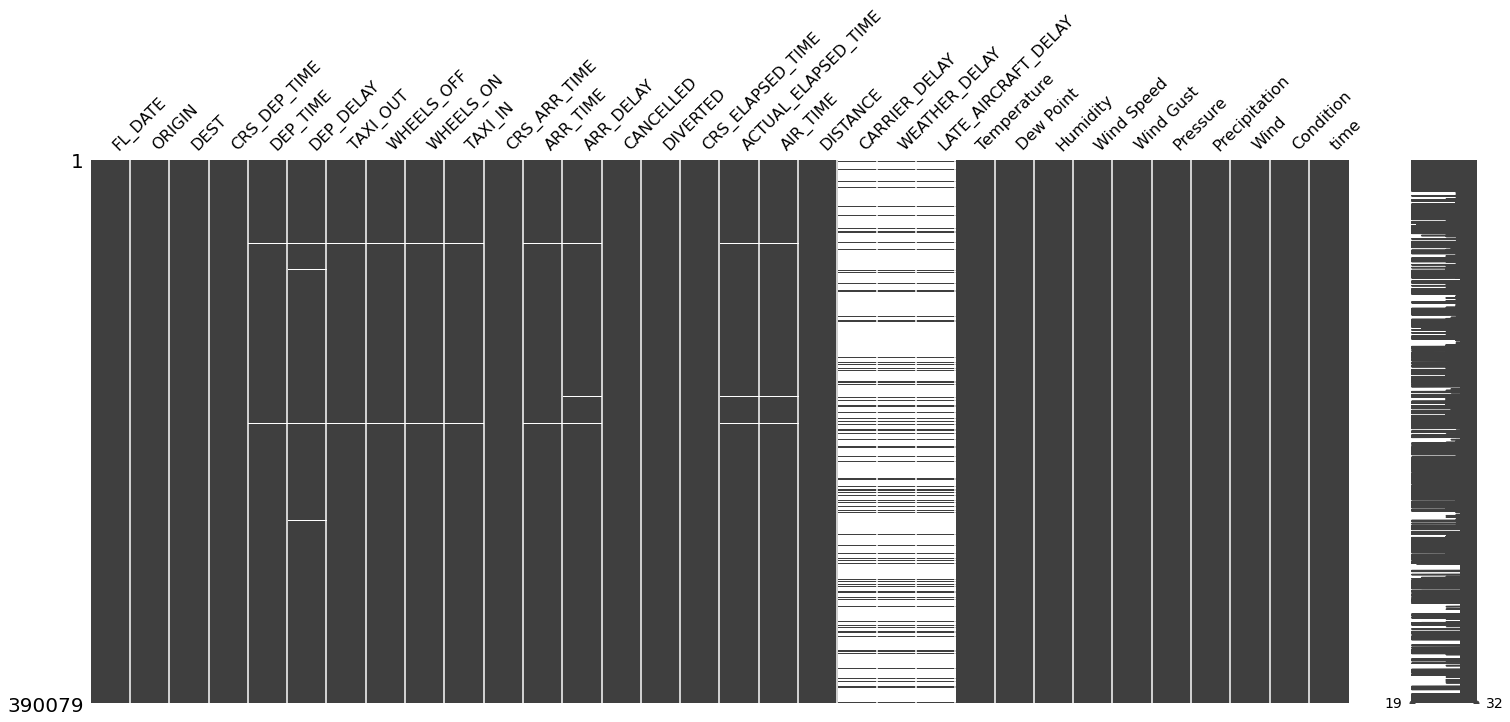

In [26]:
import missingno as ms
ms.matrix(atl)

In [28]:
atl = atl[atl['DEP_TIME'].isna()==False]

In [66]:
atl.loc[atl['DEP_TIME']>=2400,'DEP_TIME'] = 0

In [65]:
atl[(atl['DEP_TIME']>=240) & (atl['DEP_TIME']<=247)]

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Wind,Condition,time
34529,2018-02-05,ORD,ATL,2115,241.0,326.0,49.0,330.0,550.0,9.0,...,0,0,0,0,0,0,0,0,0,241
137357,2018-05-11,TYS,ATL,1922,247.0,445.0,12.0,259.0,328.0,5.0,...,0,0,0,0,0,0,0,0,0,247
193009,2018-07-01,LAS,ATL,5,241.0,156.0,10.0,251.0,920.0,12.0,...,0,0,0,0,0,0,0,0,0,241
216641,2018-07-22,PHX,ATL,11,243.0,152.0,9.0,252.0,911.0,5.0,...,0,0,0,0,0,0,0,0,0,243
227897,2018-08-01,SEA,ATL,15,246.0,151.0,11.0,257.0,1001.0,12.0,...,0,0,0,0,0,0,0,0,0,246
229274,2018-08-02,BOS,ATL,1940,242.0,422.0,24.0,306.0,518.0,10.0,...,0,0,0,0,0,0,0,0,0,242


In [14]:
atl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390079 entries, 0 to 390078
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              390079 non-null  object 
 1   ORIGIN               390079 non-null  object 
 2   DEST                 390079 non-null  object 
 3   CRS_DEP_TIME         390079 non-null  int64  
 4   DEP_TIME             387557 non-null  float64
 5   DEP_DELAY            387089 non-null  float64
 6   TAXI_OUT             387472 non-null  float64
 7   WHEELS_OFF           387472 non-null  float64
 8   WHEELS_ON            387458 non-null  float64
 9   TAXI_IN              387458 non-null  float64
 10  CRS_ARR_TIME         390079 non-null  int64  
 11  ARR_TIME             387458 non-null  float64
 12  ARR_DELAY            386390 non-null  float64
 13  CANCELLED            390079 non-null  float64
 14  DIVERTED             390079 non-null  float64
 15  CRS_ELAPSED_TIME 

In [67]:
atl['time'] = atl['DEP_TIME'].astype('str').str.split(".",expand=True)[0]

In [68]:
atl['time'].head()

0    1055
1    1429
2     945
3    2311
4    1720
Name: time, dtype: object

In [69]:
atl[atl['time'].map(lambda x: True if(len(x)<=2) else False)]

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Wind,Condition,time
128,2018-01-01,DEN,ATL,2039,58.0,259.0,29.0,127.0,539.0,11.0,...,0,0,0,0,0,0,0,0,0,58
242,2018-01-01,IAD,ATL,1635,35.0,480.0,9.0,44.0,205.0,5.0,...,0,0,0,0,0,0,0,0,0,35
677,2018-01-01,SLC,ATL,50,40.0,-10.0,26.0,106.0,556.0,6.0,...,0,0,0,0,0,0,0,0,0,40
750,2018-01-01,LAX,ATL,2359,2.0,3.0,17.0,19.0,648.0,6.0,...,0,0,0,0,0,0,0,0,0,2
1224,2018-01-02,CLT,ATL,25,18.0,-7.0,16.0,34.0,112.0,6.0,...,0,0,0,0,0,0,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389349,2018-12-31,LAS,ATL,2359,3.0,4.0,14.0,17.0,626.0,6.0,...,0,0,0,0,0,0,0,0,0,3
389512,2018-12-31,DEN,ATL,59,54.0,-5.0,13.0,107.0,529.0,8.0,...,0,0,0,0,0,0,0,0,0,54
389555,2018-12-31,PHX,ATL,35,34.0,-1.0,10.0,44.0,545.0,10.0,...,0,0,0,0,0,0,0,0,0,34
389660,2018-12-31,LAX,ATL,2350,1.0,11.0,22.0,23.0,651.0,13.0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
def timest(x):
    if(len(x)==2):
        x= "00"+x
    elif(len(x)==1):
        x="000"+x
    return x
atl['time']=atl['time'].map(timest)

In [71]:
atl.loc[atl['time'].map(lambda x: True if (x[0]=='2') & (x[1]=='4') else False),'time']

34529     241
137357    247
193009    241
216641    243
216709    248
227897    246
229274    242
Name: time, dtype: object

In [72]:
atl['time'] = atl['time'] + " "+ atl['FL_DATE']

In [73]:
atl['time'].head()

0    1055 2018-01-01
1    1429 2018-01-01
2     945 2018-01-01
3    2311 2018-01-01
4    1720 2018-01-01
Name: time, dtype: object

In [75]:
atl['time'] = pd.to_datetime(atl['time'],format="%H%M %Y-%m-%d")

In [76]:
atl['time']

0        2018-01-01 10:55:00
1        2018-01-01 14:29:00
2        2018-01-01 09:45:00
3        2018-01-01 23:11:00
4        2018-01-01 17:20:00
                 ...        
390074   2018-12-31 09:51:00
390075   2018-12-31 10:23:00
390076   2018-12-31 18:50:00
390077   2018-12-31 16:41:00
390078   2018-12-31 21:00:00
Name: time, Length: 387557, dtype: datetime64[ns]

In [78]:
weat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10748 entries, 0 to 10747
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    10748 non-null  int64  
 1   Dew Point      10748 non-null  int64  
 2   Humidity       10748 non-null  int64  
 3   Wind Speed     10748 non-null  int64  
 4   Wind Gust      10748 non-null  int64  
 5   Pressure       10748 non-null  float64
 6   Precipitation  10748 non-null  float64
 7   Wind           10740 non-null  object 
 8   Condition      10748 non-null  object 
 9   time           10748 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.2+ MB


In [79]:
weat.head(1)

,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Wind,Condition,time
0,26,11,53,15,25,29.19,0.0,NNW,Cloudy,2018-01-01 02:22:00


In [80]:
weat['time'] = pd.to_datetime(weat['time'],format="%Y-%m-%d %H:%M:%S")

In [93]:
weat[(weat['time'].dt.day==1) & (weat['time'].dt.month==1) & (weat['time'].dt.hour==14)]

,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Wind,Condition,time
16,25,9,50,12,0,29.34,0.0,NNW,Cloudy,2018-01-01 14:19:00
17,25,9,51,12,0,29.34,0.0,NNW,Cloudy,2018-01-01 14:22:00


In [106]:
weat[0:2]

2

In [109]:
weather = np.array(weat[weat['time'].dt.day==1])
weather[0]

array([26, 11, 53, 15, 25, 29.19, 0.0, 'NNW', 'Cloudy',
       Timestamp('2018-01-01 02:22:00')], dtype=object)

In [105]:
np.concatenate([weather,np.array(weat[1:2])])

array([[26, 11, 53, 15, 25, 29.19, 0.0, 'NNW', 'Cloudy',
        Timestamp('2018-01-01 02:22:00')],
       [25, 9, 51, 17, 0, 29.2, 0.0, 'NW', 'Cloudy',
        Timestamp('2018-01-01 03:22:00')]], dtype=object)

In [110]:
weat[(weat['time'].dt.day==1) & (weat['time'].dt.month==1)]['time'].dt.hour.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0, 13, 14, 15, 16, 17, 18,
       19, 21, 22, 23, 12,  1])

In [114]:
np.array(weat[(weat['time'].dt.day==1) & (weat['time'].dt.month==1)])[0]

array([26, 11, 53, 15, 25, 29.19, 0.0, 'NNW', 'Cloudy',
       Timestamp('2018-01-01 02:22:00')], dtype=object)

In [120]:
weather = np.array(weat[(weat['time'].dt.hour==0) & (weat['time'].dt.day==1) & (weat['time'].dt.month==1)])
arr = []
arr.append(weather)
arr.append(np.array(weat[(weat['time'].dt.hour==0) & (weat['time'].dt.day==1) & (weat['time'].dt.month==1)]))
arr

[array([[21, 7, 55, 14, 22, 29.37, 0.0, 'NW', 'Cloudy',
         Timestamp('2018-01-01 00:22:00')]], dtype=object),
 array([[21, 7, 55, 14, 22, 29.37, 0.0, 'NW', 'Cloudy',
         Timestamp('2018-01-01 00:22:00')]], dtype=object)]

In [121]:
arr = []
for i in range(1,13):
    if((i==1) | (i==3) | (i==5) | (i==7) | (i==8) | (i==10) | (i==12)):
        for j in range(1,32):
            for k in weat[(weat['time'].dt.day==j) & (weat['time'].dt.month==i)]['time'].dt.hour.unique():
                arr.append(np.array(weat[(weat['time'].dt.day==j) & (weat['time'].dt.month==i) & (weat['time'].dt.hour==k)])[0])
    elif(i==2):
        for j in range(1,28):
            for k in weat[(weat['time'].dt.day==j) & (weat['time'].dt.month==i)]['time'].dt.hour.unique():
                arr.append(np.array(weat[(weat['time'].dt.day==j) & (weat['time'].dt.month==i) & (weat['time'].dt.hour==k)])[0])
    else:
        for j in range(1,31):
            for k in weat[(weat['time'].dt.day==j) & (weat['time'].dt.month==i)]['time'].dt.hour.unique():
                arr.append(np.array(weat[(weat['time'].dt.day==j) & (weat['time'].dt.month==i) & (weat['time'].dt.hour==k)])[0])
len(weather)

1

In [128]:
temp = {}
for i in range(0,len(arr)):
    temp[i] = arr[i]
weather = pd.DataFrame(temp).transpose()
weather.columns = weat.columns

In [129]:
weather.head()

,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Wind,Condition,time
0,26,11,53,15,25,29.19,0.0,NNW,Cloudy,2018-01-01 02:22:00
1,25,9,51,17,0,29.2,0.0,NW,Cloudy,2018-01-01 03:22:00
2,24,7,48,14,0,29.21,0.0,NNW,Cloudy,2018-01-01 04:04:00
3,22,6,51,14,0,29.22,0.0,NNW,Cloudy,2018-01-01 05:22:00
4,21,6,53,17,0,29.23,0.0,NNW,Cloudy,2018-01-01 06:22:00


In [132]:
atl.head()

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Wind,Condition,time
0,2018-01-01,EWR,ATL,1044,1055.0,11.0,11.0,1106.0,1310.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 10:55:00
1,2018-01-01,EWR,ATL,1409,1429.0,20.0,13.0,1442.0,1646.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 14:29:00
2,2018-01-01,EWR,ATL,945,945.0,0.0,14.0,959.0,1157.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 09:45:00
3,2018-01-01,IAH,ATL,1950,2311.0,201.0,12.0,2323.0,148.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 23:11:00
4,2018-01-01,EWR,ATL,1711,1720.0,9.0,26.0,1746.0,1945.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 17:20:00


In [145]:
atl.loc[(atl['time'].dt.hour==10) & (atl['time'].dt.day==1) & (atl['time'].dt.month==1)].index

Int64Index([  0,  10,  15,  39,  40,  82,  88,  89, 131, 151, 226, 237, 241,
            243, 255, 262, 305, 310, 327, 348, 401, 410, 426, 475, 568, 593,
            629, 642, 660, 682, 737, 756, 759, 782],
           dtype='int64')

In [148]:
atl.iloc[0]['Temperature']

nan

In [210]:
weather.to_csv('/home/shaury/Desktop/pvsc/dataset/mergedwe.csv')

In [150]:
hoursunique = atl['time'].dt.hour.unique()

In [157]:
weather.loc[(weather['time'].dt.hour==0) & (weather['time'].dt.day==27) & (weather['time'].dt.month==2)]['Temperature']

1324    59
Name: Temperature, dtype: object

In [180]:
atl.loc[(atl['time'].dt.day==1) & 
                    (atl['time'].dt.month==2) ]['time'].dt.hour.unique() 

array([ 0, 17, 19,  9,  7, 12, 14,  8, 16, 11, 13, 10, 22,  6,  5, 15, 18,
       21, 20, 23])

In [ ]:
atl.loc[(atl['time'].dt.day==2) & 
                    (atl['time'].dt.month==2) & 
                    (atl['time'].dt.hour==k),'Temperature'] = weather.loc[ (weather['time'].dt.hour==k) & 
                                                                      (weather['time'].dt.day==j) & 
                                                                      (weather['time'].dt.month==i),'Temperature']

In [202]:
weather[(weather['time'].dt.hour==k) & (weather['time'].dt.day==j) & (weather['time'].dt.month==i)]['Temperature'].values[0]

45

In [207]:
ATL = atl.copy(deep=True)

In [208]:
for i in range(1,2):
    for j in range(1,32):
        hoursunique = ATL.loc[(ATL['time'].dt.day==j) & (ATL['time'].dt.month==i)]['time'].dt.hour.unique()
        for k in hoursunique:
            if(len(weather[(weather['time'].dt.hour==k) & (weather['time'].dt.day==j) & (weather['time'].dt.month==i)]['Temperature'].values)>0):
                ans = weather[(weather['time'].dt.hour==k) & (weather['time'].dt.day==j) & (weather['time'].dt.month==i)]['Temperature'].values[0]
                print(ans)
                ATL.loc[(ATL['time'].dt.day==j) & (ATL['time'].dt.month==i) & (ATL['time'].dt.hour==k) & (ATL['Temperature'].isna()),'Temperature'] = ans

19
25
19
20
27
21
20
19
22
23
21
19
25
19
28
28
22
21
24
15
33
28
15
25
13
35
32
17
35
31
33
21
35
13
31
30
29
29
17
30
36
28
32
37
31
27
30
28
30
37
37
28
34
33
38
27
35
30
24
26
34
26
28
32
26
22
23
33
29
28
34
23
33
23
31
24
23
36
31
37
29
18
27
17
18
23
38
35
30
19
33
38
27
17
31
29
22
23
31
27
37
38
38
27
39
39
24
22
35
31
22
30
34
33
27
30
38
36
39
32
22
32
22
28
22
35
39
39
24
36
37
23
33
32
30
32
42
38
31
34
39
37
42
40
43
40
34
32
32
37
37
37
37
61
54
47
59
53
41
50
64
43
55
39
63
58
63
46
44
52
58
54
54
55
64
62
63
62
59
63
59
57
64
63
54
55
54
62
61
60
60
55
56
53
59
58
54
58
59
53
55
59
59
59
57
53
53
58
56
58
63
58
56
40
60
61
58
53
29
33
57
36
57
61
47
57
61
58
31
32
34
30
24
31
33
29
28
28
35
36
37
30
29
34
28
27
29
26
19
20
29
37
25
21
33
35
40
41
39
36
18
18
34
34
38
33
33
35
45
37
32
46
40
28
43
48
27
41
28
46
48
29
27
39
42
39
48
33
32
49
48
30
41
40
36
48
49
47
33
35
32
32
43
45
30
16
20
25
21
22
15
24
17
19
16
20
21
22
23
25
14
22
18
20
27
34
30
22
37
32
15
35
40
1

In [209]:
ATL['Temperature'].unique()

array([0, nan], dtype=object)

In [165]:
atl.loc[(atl['time'].dt.day==1) & 
                    (atl['time'].dt.month==2) & 
                    (atl['time'].dt.hour==5)]

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Wind,Condition,time
30642,2018-02-01,EWR,ATL,605,552.0,-13.0,14.0,606.0,805.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01 05:52:00
30646,2018-02-01,SGF,ATL,600,558.0,-2.0,21.0,619.0,837.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01 05:58:00
30664,2018-02-01,PIA,ATL,600,550.0,-10.0,11.0,601.0,822.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01 05:50:00
30666,2018-02-01,AEX,ATL,605,555.0,-10.0,15.0,610.0,822.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01 05:55:00
30672,2018-02-01,OAJ,ATL,545,542.0,-3.0,23.0,605.0,716.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01 05:42:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31668,2018-02-01,RIC,ATL,544,541.0,-3.0,14.0,555.0,714.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01 05:41:00
31670,2018-02-01,CLE,ATL,600,555.0,-5.0,10.0,605.0,733.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01 05:55:00
31673,2018-02-01,OKC,ATL,600,553.0,-7.0,11.0,604.0,838.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01 05:53:00
31689,2018-02-01,CVG,ATL,550,543.0,-7.0,12.0,555.0,701.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01 05:43:00


In [197]:
atl['Temperature'].unique()

array([nan], dtype=object)

In [1]:
for i in range(1,13):
    for j in range(1,32):
        for k in hoursunique:
            atl.loc[(atl['time'].dt.day==j) & 
                    (atl['time'].dt.month==i) & 
                    (atl['time'].dt.hour==k),'Wind Speed'] = weather[ (weather['time'].dt.hour==k) & 
                                                                      (weather['time'].dt.day==j) & 
                                                                      (weather['time'].dt.month==i)]['Wind Speed']
            

In [ ]:
for i in range(1,13):
    for j in range(1,32):
        for k in hoursunique:
            atl.loc[(atl['time'].dt.day==j) & 
                    (atl['time'].dt.month==i) & 
                    (atl['time'].dt.hour==k),'Condition'] = weather[ (weather['time'].dt.hour==k) & 
                                                                      (weather['time'].dt.day==j) & 
                                                                      (weather['time'].dt.month==i)]['Condition']
            

In [ ]:
atl.head(10)